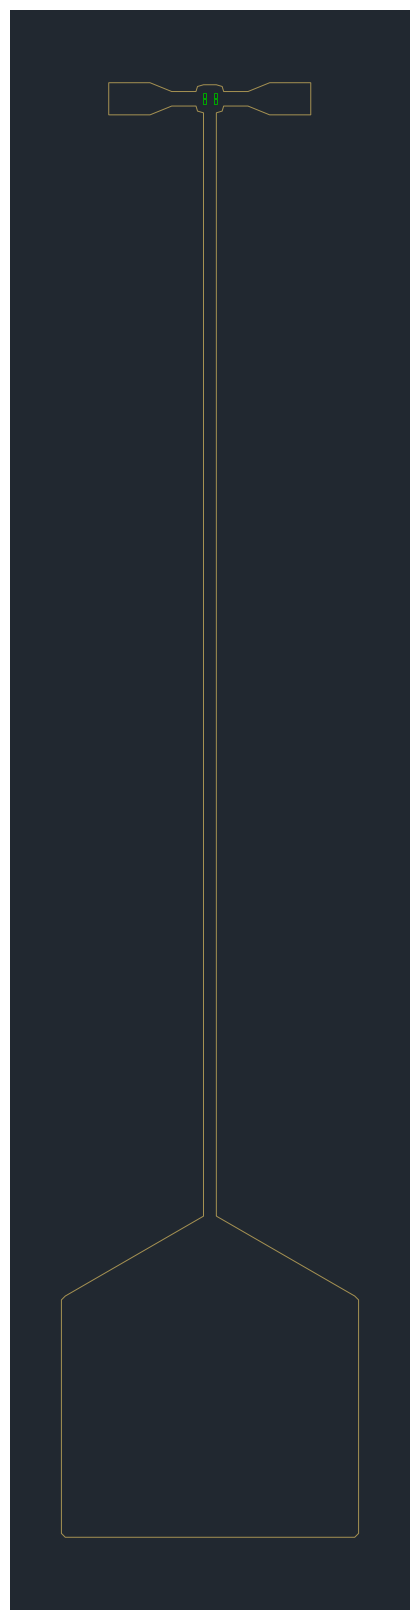

In [1]:
import sys
import ezdxf
import matplotlib.pyplot as plt
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend

# Safe loading procedure (requires ezdxf v0.14):
try:
    doc, auditor = recover.readfile(r'C:\Users\max\Desktop\NanoStride\test_files\Nov2025design_nanoclip_outline_v4.dxf')
except IOError:
    print(f'Not a DXF file or a generic I/O error.')
    sys.exit(1)
except ezdxf.DXFStructureError:
    print(f'Invalid or corrupted DXF file.')
    sys.exit(2)

if not auditor.has_errors:
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)

In [2]:
outline = ezdxf.readfile(r'C:\Users\max\Desktop\NanoStride\test_files\Nov2025design_nanoclip_outline_v4.dxf')
msp = outline.modelspace()

In [3]:
for layer in outline.layers:
    print(layer)

LAYER(#2)
LAYER(#3)
LAYER(#4)
LAYER(#B0)


In [4]:
coordinates = []

for entity in msp:
    if entity.dxftype() == 'LWPOLYLINE':
        points = entity.get_points()  # Returns (x, y, [start_width, end_width, bulge])
        for x, y, *_ in points:
            coordinates.append((x, y))

    elif entity.dxftype() == 'POLYLINE':
        for vertex in entity.vertices:
            x, y = vertex.dxf.location.x, vertex.dxf.location.y
            coordinates.append((x, y))

for pt in coordinates:
    print(pt)


(22622.435, 6976.248)
(22687.435, 6976.248)
(22687.435, 7093.748)
(22622.435, 7093.748)
(22622.435, 7115.248)
(22687.435, 7115.248)
(22687.435, 7232.748)
(22622.435, 7232.748)
(22353.435, 6976.248)
(22418.435, 6976.248)
(22418.435, 7093.748)
(22353.435, 7093.748)
(22353.435, 7115.248)
(22418.435, 7115.248)
(22418.435, 7232.748)
(22353.435, 7232.748)
(19053.937, -26389.567)
(19143.931, -26479.609)
(25901.949, -26479.563)
(25991.949, -26389.563)
(25991.949, -20937.563)
(25901.949, -20847.563)
(22672.079, -18982.553)
(22671.119, -18982.553)
(22671.119, 6777.116)
(22806.657, 6817.066)
(22841.973, 6935.299)
(23409.064, 6935.299)
(23915.472, 6729.566)
(24875.472, 6729.566)
(24875.472, 7479.566)
(23915.472, 7479.566)
(23409.165, 7273.918)
(22841.973, 7273.918)
(22806.657, 7392.066)
(22671.119, 7432.016)
(22371.119, 7432.016)
(22231.657, 7392.066)
(22195.059, 7274.157)
(21629.149, 7274.157)
(21629.149, 7273.918)
(21122.842, 7479.566)
(20158.666, 7479.566)
(20158.666, 6729.566)
(21122.842, 6729

In [26]:
coordinates_mm = [(x / 1000, y / 1000) for x, y in coordinates]

In [ ]:
len(coordinates_mm)